In [6]:
import os
import re
import yaml
import numpy as np
import pandas as pd
from utils.config import *
from utils.default_dict import *
import matplotlib.pyplot as plt 

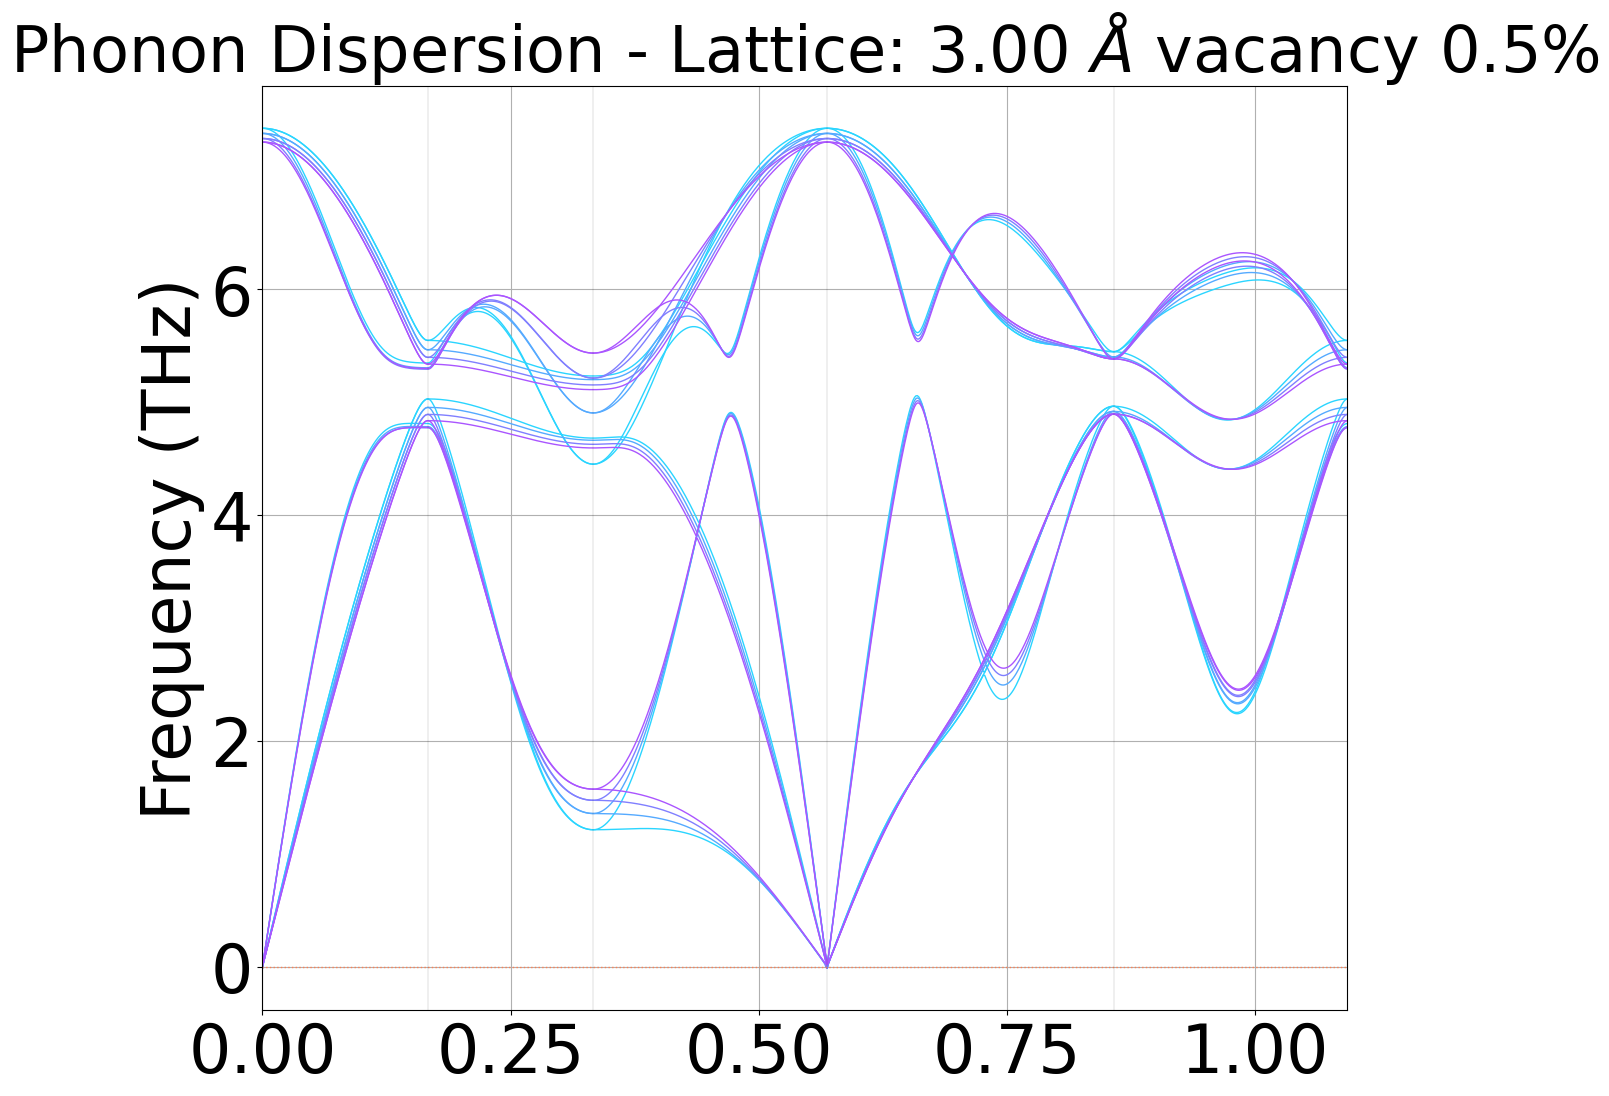

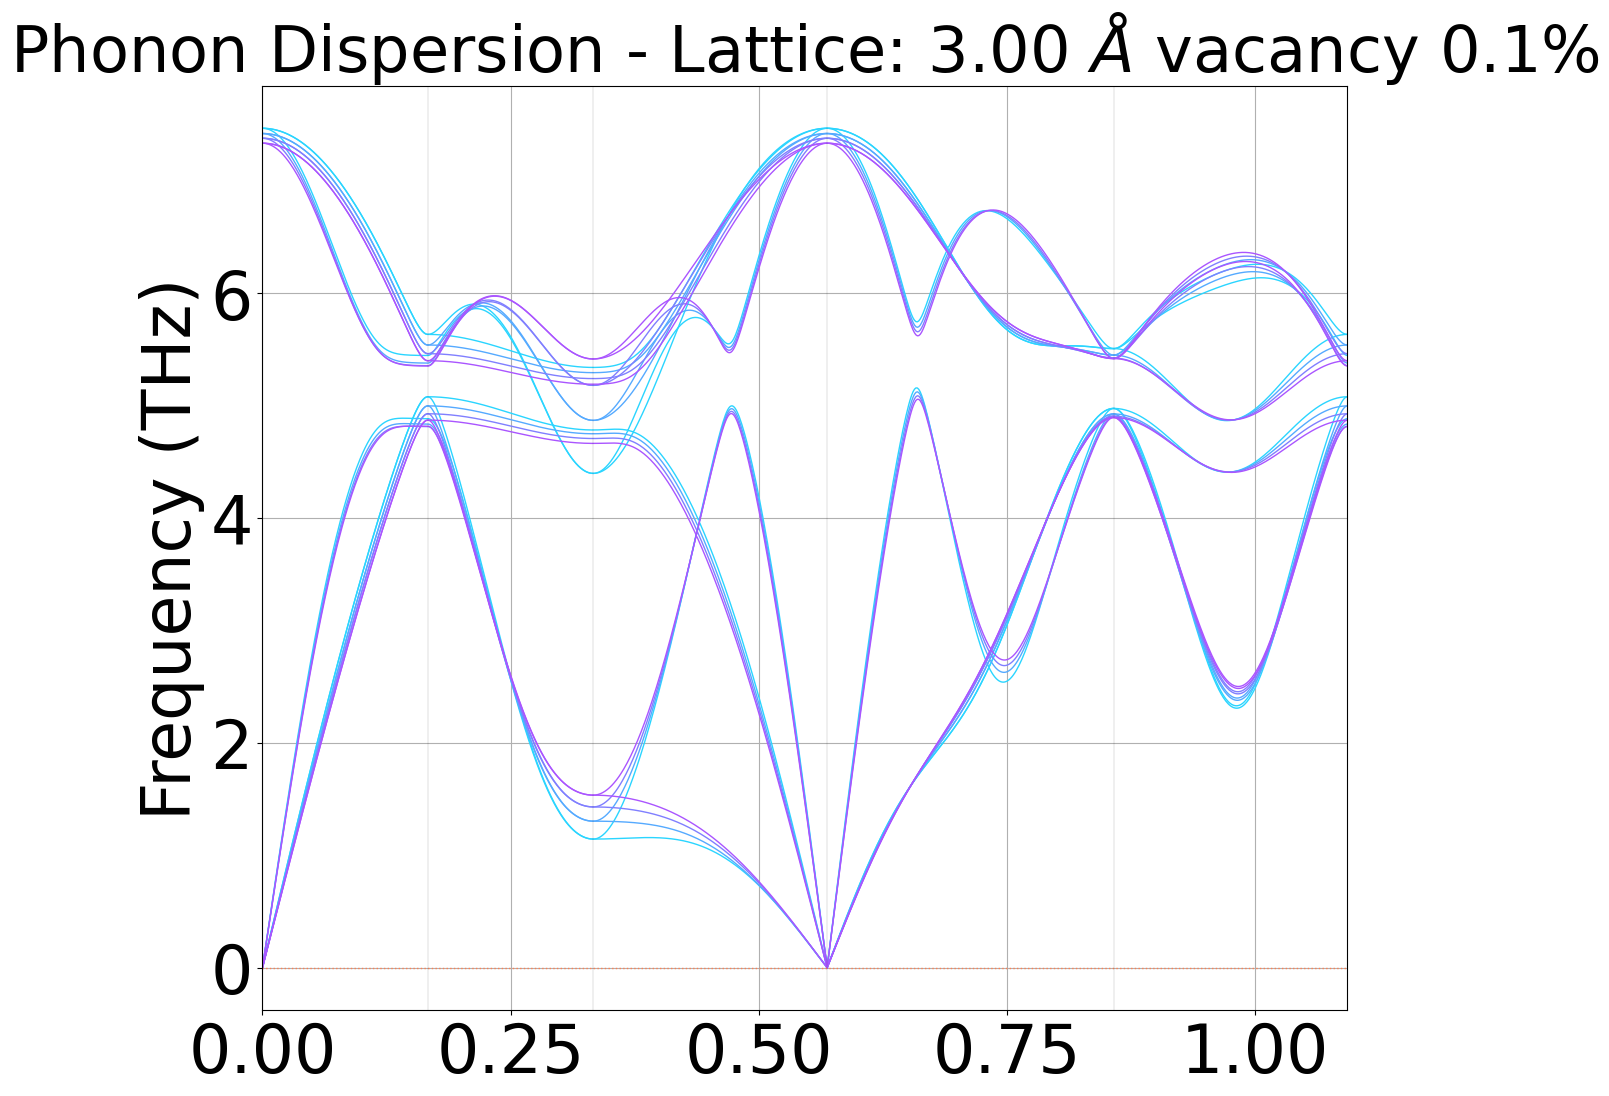

In [7]:
# extra_point = np.array([[-100 * 0.0299792458, 0]])
# all_data = np.vstack((data_points, extra_point))
colors = ['#2ad5ff','#55aaff','#807fff','#aa55ff']

pd1 = pd.read_csv('/global/cfs/projectdirs/m3845/Diego_projects/NiTi/Phonons/Default Dataset-7.csv')
# pd1
data_points = np.array(pd1)
for defect in vacancy_percents:
    for a in range(1): 
        plt.figure(figsize=(14, 12)) 
    
        for T in range(4): 
            #file_path = f"/global/cfs/projectdirs/m3845/Diego_projects/NiTi/Phonons/molecular_dynamics_1/Concentration_0.50-0.50/Simulation_Deffect_0%/NiTi_bcc_{(3.00 + a * 0.01):.2f}_{200 + T * 100}/band_0.yaml"
            file_path = f'{simulations_path_vacancies}' + f'vacancy_{defect}%/'+ f"NiTi_T_{300 + T * 100}_L_{(3.00 + a * 0.01):.2f}/"+'band_0.yaml'
            try:
                with open(file_path, "r") as file:
                    data = yaml.safe_load(file)
    
                segment_nqpoint = data.get("segment_nqpoint", [201] * 5)
                distances = np.array([point["distance"] for point in data["phonon"]])
                phonon_bands = np.array([[band["frequency"] for band in point["band"]] for point in data["phonon"]]).T  
    
                special_points = [distances[min(sum(segment_nqpoint[:i]), len(distances) - 1)] for i in range(len(segment_nqpoint) + 1)]
                labels = [r'$\Gamma$', 'X', 'M', r'$\Gamma$', 'R', 'X']
    
                for band in phonon_bands:
                    plt.plot(distances, band, color=colors[T], linewidth=1)
    
            except FileNotFoundError:
                print(f"Warning: File not found: {file_path}")
                continue
            except Exception as e:
                print(f"Error processing {file_path}: {e}")
                continue
    
        plt.axhline(y=0, color='Coral', linestyle='dotted', linewidth=1) 
        for sp in special_points[1:-1]:  
            plt.axvline(x=sp, color='black', linestyle='-', alpha=0.3, linewidth=0.3)
    
        #plt.scatter(data_points[:, 0], data_points[:, 1], color='black', label='Additional Data',marker='*')
        plt.ylabel("Frequency (THz)", fontsize=48)
        plt.xlim(0, distances[-1])
        # plt.ylim(-1, 10)
        plt.grid(True)
        #plt.title(fr"Phonon Dispersion - Lattice: {3.00 +a * 0.01):.2f} $\AA$ vacancy {defect}%", fontsize=46)
        plt.title(fr"Phonon Dispersion - Lattice: {(3.00 + a * 0.01):.2f} $\AA$ vacancy {defect}%", fontsize=46)

        plt.tick_params(axis='both', which='major', labelsize=48)
        plt.savefig(f'./phon_disp{(3.00 + a * 0.01):.2f}_vac{defect}.png', bbox_inches='tight', pad_inches=0.1, transparent=True)
        plt.show()